<a href="https://colab.research.google.com/github/Dice128/2025_VISIKOMPUTER_TI-2B/blob/main/Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langkah Praktikum
## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana
ayangkan Anda baru pertama kali mengenalkan komputer pada dunia visual. Sebelum
komputer bisa mengenali gambar kompleks seperti mobil atau wajah manusia, mari kita
ajarkan dulu konsep sederhana: mengenali angka tulisan tangan. Dataset MNIST yang berisi
digit 0–9 adalah titik awal yang bagus.

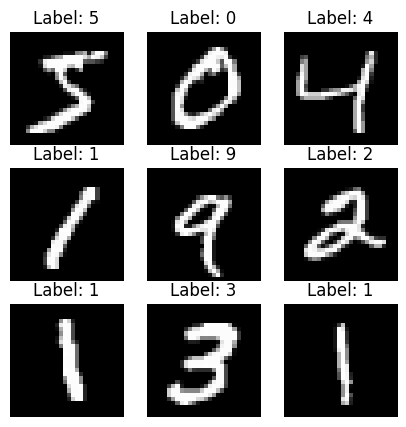

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

### Tugas Kecil
Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak
contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

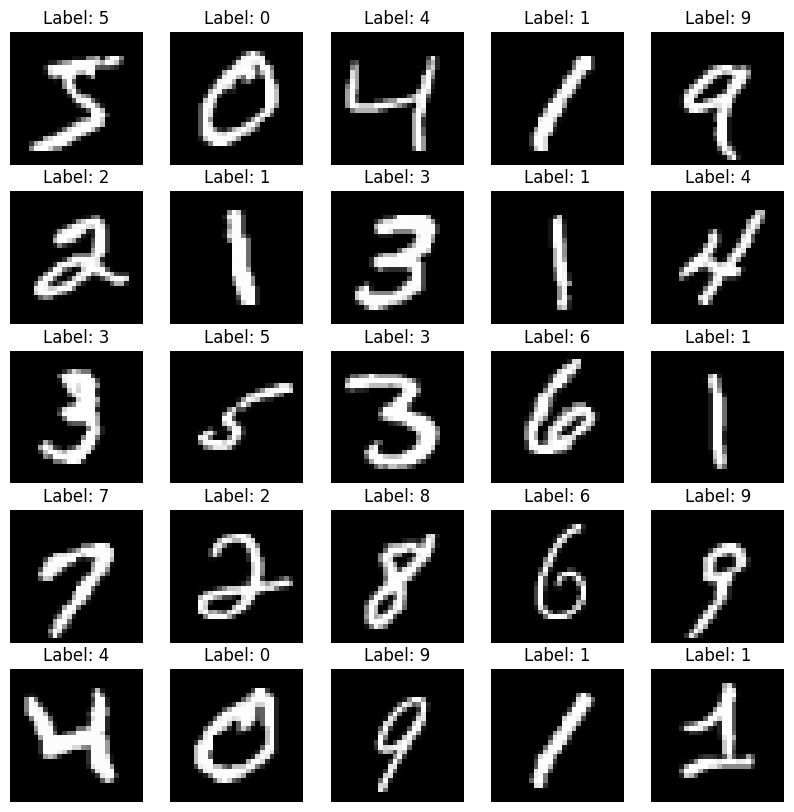

In [11]:
import matplotlib.pyplot as plt

# Asumsikan x_train dan y_train sudah ada
# (x_train, y_train), _ = mnist.load_data()

plt.figure(figsize=(10,10)) # Ukuran figure bisa diperbesar agar gambar tidak terlalu kecil
for i in range(25):
  # DIUBAH: Grid diperbesar menjadi 5x5 agar muat 25 gambar
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional
Sebelum CNN populer, pendekatan klasik digunakan. Mari kita coba Support Vector
Machine (SVM). Dataset yang kita pakai tetap MNIST, tapi gambar harus diubah menjadi
vektor 1D.

In [14]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print(f"Akurasi SVM: {accuracy_score(y_test, y_pred):.4f}")

Akurasi SVM: 0.9101


### Tugas Kecil
Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap
akurasi?

In [15]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print(f"Akurasi SVM: {accuracy_score(y_test, y_pred):.4f}")

Akurasi SVM: 0.9513
